In [3]:
import os

# List all images in the directory
path = 'processed_data/all_images'

# Create a list of all the image paths
image_paths = os.listdir(path)

print('Number of images: {}'.format(len(image_paths)))

Number of images: 103536


Number of pixels: 36040


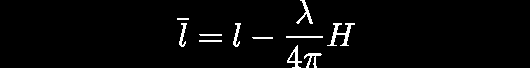

In [9]:
import cv2

from PIL import Image
from IPython.display import display

# Get a random image index
import random
index = random.randint(0, len(image_paths)-1)

# Get the image name
image_name = image_paths[index]

# Load the image from a file path
img_path = os.path.join(path, image_name)
img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Bounding box (top, bottom, left, right)
box = (119.0, 187.0, 381.0, 911.0)

# Crop the image
img_arr = img_arr[int(box[0]):int(box[1]), int(box[2]):int(box[3])]

# Convert the image to a PIL image
img = Image.fromarray(img_arr)

# Print number of pixels
print('Number of pixels: {}'.format(img.size[0] * img.size[1]))


# Show the image in Jupyter notebook
display(img)



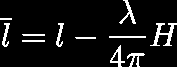

In [10]:
# Print the first row of pixels in the image to contain a white pixel



def get_box(img_arr):
    img_height = img_arr.shape[0]
    img_width = img_arr.shape[1]


    top = 0
    bottom = 0
    left = 0
    right = 0

    # print('Image height: {}'.format(img_height))
    # print('Image width: {}'.format(img_width))

    for i in range(img_height):
        row = img_arr[i]
        # Check if the row contains a white pixel
        if 255 in row:
            # print('First row with white pixel: {}'.format(i))
            top = i
            break

    for i in range(img_height-1, -1, -1):
        row = img_arr[i]
        # Check if the row contains a white pixel
        if 255 in row:
            # print('Last row with white pixel: {}'.format(i))
            bottom = i
            break

    for i in range(img_width):
        col = img_arr[:, i]
        # Check if the column contains a white pixel
        if 255 in col:
            # print('First column with white pixel: {}'.format(i))
            left = i
            break

    for i in range(img_width-1, -1, -1):
        col = img_arr[:, i]
        # Check if the column contains a white pixel
        if 255 in col:
            # print('Last column with white pixel: {}'.format(i))
            right = i
            break

    return top, bottom, left, right

top, bottom, left, right = get_box(img_arr)

# Crop the image to the bounding box
img = img.crop((left, top, right, bottom))

# Show the image in Jupyter notebook
display(img)



In [41]:
# bounding_boxes = {}

# count = 0
# for image_name in image_paths:
#     img_path = os.path.join(path, image_name)
#     img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     top, bottom, left, right = get_box(img_arr)
#     bounding_boxes[image_name] = (top, bottom, left, right)

#     count += 1
#     if count % 1000 == 0:
#         print('Processed {} images'.format(count))

# print(bounding_boxes)


# import json

# # Save the bounding boxes to a JSON file
# with open('processed_data/bounding_boxes.json', 'w') as f:
#     json.dump(bounding_boxes, f)


Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images
Processed 12000 images
Processed 13000 images
Processed 14000 images
Processed 15000 images
Processed 16000 images
Processed 17000 images
Processed 18000 images
Processed 19000 images
Processed 20000 images
Processed 21000 images
Processed 22000 images
Processed 23000 images
Processed 24000 images
Processed 25000 images
Processed 26000 images
Processed 27000 images
Processed 28000 images
Processed 29000 images
Processed 30000 images
Processed 31000 images
Processed 32000 images
Processed 33000 images
Processed 34000 images
Processed 35000 images
Processed 36000 images
Processed 37000 images
Processed 38000 images
Processed 39000 images
Processed 40000 images
Processed 41000 images
Processed 42000 images
Processed 43000 images
Processed 44000 imag

In [11]:
import json

# Load the bounding boxes from a JSON file
bounding_boxes = json.load(open('processed_data/bounding_boxes.json'))

In [12]:
# Fine the mean, median, and standard deviation of each position on the bounding box
import numpy as np

tops = []
bottoms = []
lefts = []
rights = []

for image_name, (top, bottom, left, right) in bounding_boxes.items():
    tops.append(top)
    bottoms.append(bottom)
    lefts.append(left)
    rights.append(right)

print('Mean top: {}'.format(np.mean(tops)))
print('Median top: {}'.format(np.median(tops)))
print('Standard deviation top: {}'.format(np.std(tops)))
print('Highest top: {}'.format(np.min(tops)))
print('Lowest top: {}'.format(np.max(tops)))
print()

print('Mean bottom: {}'.format(np.mean(bottoms)))
print('Median bottom: {}'.format(np.median(bottoms)))
print('Standard deviation bottom: {}'.format(np.std(bottoms)))
print('Lowest bottom: {}'.format(np.max(bottoms)))
print('Highest bottom: {}'.format(np.min(bottoms)))
print()

print('Mean left: {}'.format(np.mean(lefts)))
print('Median left: {}'.format(np.median(lefts)))
print('Standard deviation left: {}'.format(np.std(lefts)))
print('Widest left: {}'.format(np.min(lefts)))
print('Narrowest left: {}'.format(np.max(lefts)))
print()

print('Mean right: {}'.format(np.mean(rights)))
print('Median right: {}'.format(np.median(rights)))
print('Standard deviation right: {}'.format(np.std(rights)))
print('Widest right: {}'.format(np.max(rights)))
print('Narrowest right: {}'.format(np.min(rights)))
print()




Mean top: 121.98390897851955
Median top: 119.0
Standard deviation top: 8.099612597812632
Highest top: 0
Lowest top: 271

Mean bottom: 186.10553817029825
Median bottom: 186.0
Standard deviation bottom: 29.736809081161393
Lowest bottom: 549
Highest bottom: 0

Mean left: 377.04518235203216
Median left: 397.0
Standard deviation left: 121.84269527308291
Widest left: 0
Narrowest left: 997

Mean right: 913.4344092875908
Median right: 894.0
Standard deviation right: 132.5217131935552
Widest right: 1253
Narrowest right: 0



Text(0.5, 1.0, 'Top/Bottom')

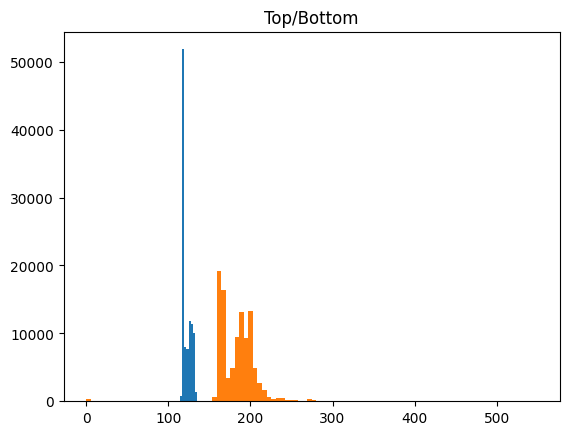

In [13]:
# Graph the distribution of the bounding box positions

import matplotlib.pyplot as plt

plt.hist(tops, bins=100)

plt.hist(bottoms, bins=100)

plt.title('Top/Bottom')

Text(0.5, 1.0, 'Left/Right')

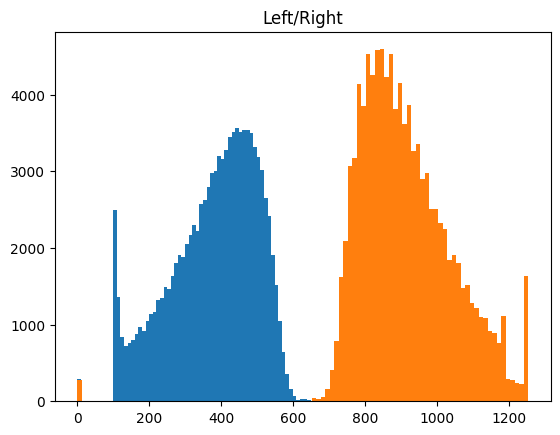

In [14]:
plt.hist(lefts, bins=100)

plt.hist(rights, bins=100)

plt.title('Left/Right')

100% Covering: (0.0, 549.0, 0.0, 1253.0)
Num pixels: 687897.0
95% Covering: (117.0, 238.0, 109.0, 1194.0)
Num pixels: 131285.0
90% Covering: (117.0, 218.0, 133.0, 1156.0)
Num pixels: 103323.0
80% Covering: (118.0, 207.0, 193.0, 1097.0)
Num pixels: 80456.0
70% Covering: (118.0, 202.0, 236.0, 1055.0)
Num pixels: 68796.0
60% Covering: (118.0, 201.0, 270.0, 1021.0)
Num pixels: 62333.0
50% Covering: (118.0, 199.0, 298.0, 993.0)
Num pixels: 56295.0
10% Covering: (119.0, 187.0, 389.0, 902.0)
Num pixels: 34884.0



Text(0.5, 1.0, 'Pixels in Bounding Box')

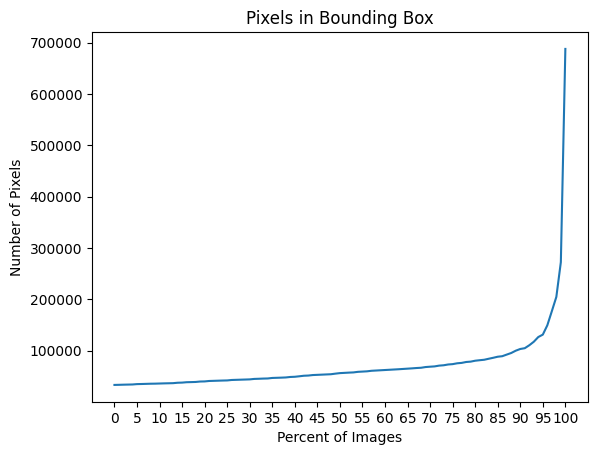

In [15]:
import numpy as np

def find_x_percent_covering_bbox(bbox_dict, x=90):
    tops = []
    bottoms = []
    lefts = []
    rights = []

    # Collect all the values for each dimension in separate lists
    for bbox in bbox_dict.values():
        top, bottom, left, right = bbox
        tops.append(top)
        bottoms.append(bottom)
        lefts.append(left)
        rights.append(right)

    # Calculate the 5th and 95th percentiles for each dimension
    top_5th = np.percentile(tops, (100-x)/2)
    bottom_95th = np.percentile(bottoms, 100-(100-x)/2)
    left_5th = np.percentile(lefts, (100-x)/2)
    right_95th = np.percentile(rights, 100-(100-x)/2)

    # Create the 90% covering bounding box
    covering_bbox = (top_5th, bottom_95th, left_5th, right_95th)

    return covering_bbox

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=100)
print("100% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=95)
print("95% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=90)
print("90% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=80)
print("80% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=70)
print("70% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=60)
print("60% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=50)
print("50% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))

covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=5)
print("10% Covering:", covering_bbox)
print('Num pixels: {}'.format((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2])))
print()


pixels = []
for i in range(0, 101):
    covering_bbox = find_x_percent_covering_bbox(bounding_boxes, x=i)
    pixels.append((covering_bbox[1]-covering_bbox[0])*(covering_bbox[3]-covering_bbox[2]))

plt.plot(range(0, 101), pixels)
# add more ticks to the x-axis
plt.xticks(range(0, 101, 5))
plt.xlabel('Percent of Images')
plt.ylabel('Number of Pixels')

plt.title('Pixels in Bounding Box')



In [16]:
def filter_elements_inside_bbox(bbox_dict, target_bbox):
    target_top, target_bottom, target_left, target_right = target_bbox
    inside_bbox = {}

    for filename, bbox in bbox_dict.items():
        top, bottom, left, right = bbox

        if (top >= target_top and bottom <= target_bottom and
                left >= target_left and right <= target_right):
            inside_bbox[filename] = bbox

    return inside_bbox

# target_bbox = (118.0, 199.0, 298.0, 993.0)  # Replace this with your target bounding box
target_bbox = (118.0, 199.0, 298.0, 993.0)  # Replace this with your target bounding box
filtered_elements = filter_elements_inside_bbox(bounding_boxes, target_bbox)

print("Length of filtered elements:", len(filtered_elements))


Length of filtered elements: 59294


Image shape: (81, 695)
Number of pixels: 56295


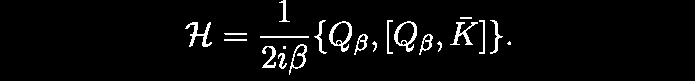

In [17]:
import cv2

from PIL import Image
from IPython.display import display

# get random item from dictionary
image_name = random.choice(list(filtered_elements.keys()))

# Load the image from a file path
img_path = os.path.join(path, image_name)
img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Bounding box (top, bottom, left, right)
box = (118.0, 199.0, 298.0, 993.0)

# Crop the image
img_arr = img_arr[int(box[0]):int(box[1]), int(box[2]):int(box[3])]

print('Image shape: {}'.format(img_arr.shape))

# Convert the image to a PIL image
img = Image.fromarray(img_arr)


# Print number of pixels
print('Number of pixels: {}'.format(img.size[0] * img.size[1]))


# Show the image in Jupyter notebook
display(img)


In [273]:
# count = 0

# for image_name, bbox in filtered_elements.items():
#     # Load the image from a file path
#     img_path = os.path.join(path, image_name)
#     img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#     # Bounding box (top, bottom, left, right)
#     box = (118.0, 199.0, 298.0, 993.0)

#     # # Convert the box so the size is divisible by 4, but still covers the same area
#     # box = (box[0] - box[0] % 4, box[1] + (4 - box[1] % 4), box[2] - box[2] % 4, box[3] + (4 - box[3] % 4))

#     # Crop the image
#     img_arr = img_arr[int(box[0]):int(box[1]), int(box[2]):int(box[3])]

#     # Save the image to a file path
#     save_path = 'processed_data/small_images/' + image_name
#     cv2.imwrite(save_path, img_arr)

#     count += 1

#     if count % 1000 == 0:
#         print("Processed {} images".format(count))




Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images
Processed 12000 images
Processed 13000 images
Processed 14000 images
Processed 15000 images
Processed 16000 images
Processed 17000 images
Processed 18000 images
Processed 19000 images
Processed 20000 images
Processed 21000 images
Processed 22000 images
Processed 23000 images
Processed 24000 images
Processed 25000 images
Processed 26000 images
Processed 27000 images
Processed 28000 images
Processed 29000 images
Processed 30000 images
Processed 31000 images
Processed 32000 images
Processed 33000 images
Processed 34000 images
Processed 35000 images
Processed 36000 images
Processed 37000 images
Processed 38000 images
Processed 39000 images
Processed 40000 images
Processed 41000 images
Processed 42000 images
Processed 43000 images
Processed 44000 imag

In [18]:
import os

# open processed_data/all_formulas.txt
with open('processed_data/all_formulas.txt', 'r') as f:
    formulas = f.readlines()

# Print number of images in all_images
print("Number of images:", len(os.listdir('processed_data/all_images')))

print(len(formulas))

with open('processed_data/small_formulas.txt', 'w') as f:
    for formula in formulas:
        if formula.split(' ')[0] in filtered_elements:
            f.write(formula)

# Print the number of formulas in small_formulas.txt
print("Number of formulas:", len(open('processed_data/small_formulas.txt').readlines()))

# Print number of images in small_images
print("Number of images:", len(os.listdir('processed_data/small_images')))

Number of images: 103536
103536
Number of formulas: 59294
Number of images: 59294


In [23]:
# import os
# import random
# from PIL import Image

# # Set the path
# path = 'processed_data/validate_images/'

# # Get a list of all image files in the directory
# file_list = [file_name for file_name in os.listdir(path) if file_name.endswith('.png')]

# # Choose a random image from the list
# random_file = random.choice(file_list)

# # Load the image using PIL
# image = Image.open(os.path.join(path, random_file))

# # Get the image size as a tuple in the format (width, height)
# size = image.size

# # Print the shape of the image
# print(size)

# print()

(1254, 550)

